In [3]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [5]:
import tensorflow as tf
import keras
import numpy as np
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
train_dir= '/content/Dataset/Train'
test_dir= '/content/Dataset/Test'
validation_dir= '/content/Dataset/Validation'

In [7]:
train_image_gen= ImageDataGenerator(rescale=1./255)
test_image_gen= ImageDataGenerator(rescale=1./255)
validation_image_gen= ImageDataGenerator(rescale=1./255)

In [8]:
train_data= train_image_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode= 'binary'
)

test_data= test_image_gen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode= 'binary',
    shuffle=False
)

validation_data= validation_image_gen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode= 'binary'
)

Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


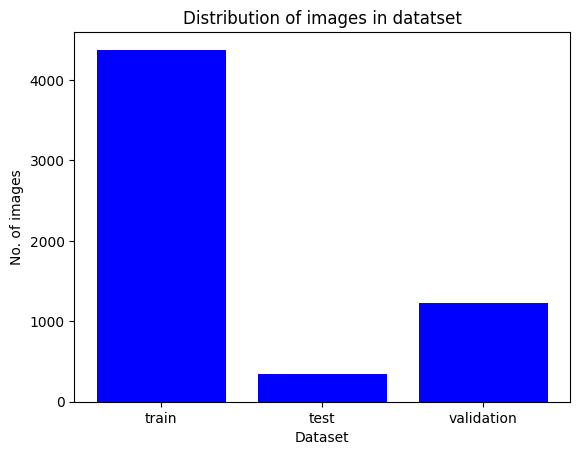

In [9]:
train_size= len(train_data)
test_size= len(test_data)
validation_size= len(validation_data)

x= ['train', 'test', 'validation']
y= [train_size, test_size, validation_size]

plt.bar(x, y, color='blue')
plt.xlabel("Dataset")
plt.ylabel("No. of images")
plt.title("Distribution of images in datatset")
plt.show()

In [10]:
from tensorflow.keras.applications import ResNet50V2
base_model= ResNet50V2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
for layer in base_model.layers:
    layer.trainable= False

Resnet = Sequential()

Resnet.add(base_model)
Resnet.add(Flatten())
Resnet.add(Dense(128, activation='relu'))
Resnet.add(BatchNormalization())
Resnet.add(Dropout(0.5))
Resnet.add(Dense(1, activation='sigmoid'))

In [12]:
Resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
early_stop= EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [14]:
history= Resnet.fit(train_data, validation_data=validation_data, epochs=10, callbacks=[early_stop])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 293s 64ms/step - accuracy: 0.7857 - loss: 0.4593 - val_accuracy: 0.8130 - val_loss: 0.4014
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 242s 55ms/step - accuracy: 0.8414 - loss: 0.3514 - val_accuracy: 0.8222 - val_loss: 0.3901
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 233s 53ms/step - accuracy: 0.8560 - loss: 0.3222 - val_accuracy: 0.8342 - val_loss: 0.3652
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 295s 61ms/step - accuracy: 0.8664 - loss: 0.3046 - val_accuracy: 0.8344 - val_loss: 0.3675
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 284s 52ms/step - accuracy: 0.8744 - loss: 0.2869 - val_accuracy: 0.8389 - val_loss: 0.3645
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 226s 52ms/step - accuracy: 0.8805 - loss: 0.2747 - val_accuracy: 0.8410 - val_loss: 0.3643
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 232s 53ms/step - accuracy: 0.8885 - loss: 0.2609 - val_accuracy: 0.8465 - val_loss: 0.3514
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 291s 60ms/step - accuracy: 0.8945 - lo

In [15]:
loss, accuracy= Resnet.evaluate(test_data)
print("Test Acuuracy is :")
print(accuracy)
print("Test Loss is :")
print(loss)

341/341 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.8083 - loss: 0.4646
Test Acuuracy is :
0.7728564739227295
Test Loss is :
0.7072618007659912


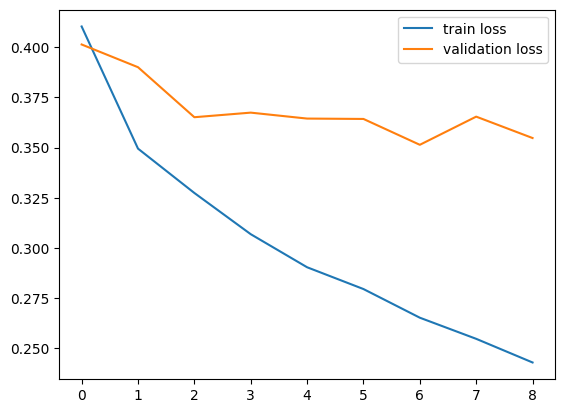

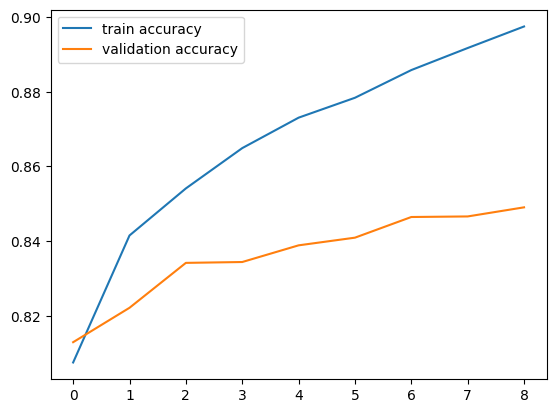

In [16]:
plt.plot(history.history['loss'], label='train loss' )
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy' )
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

341/341 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step


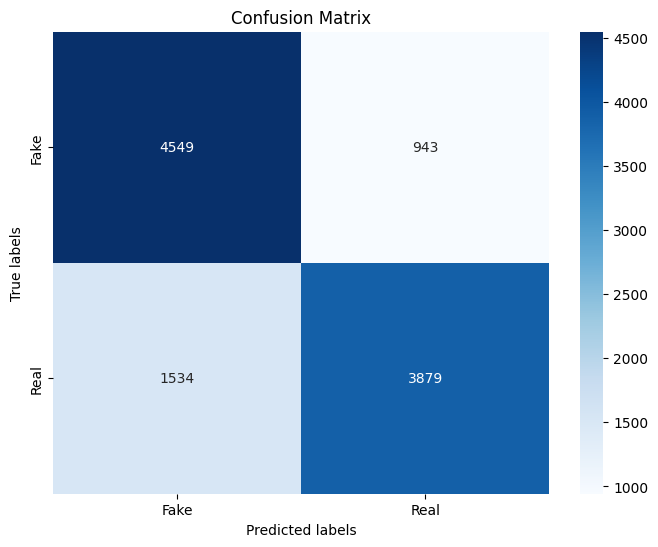

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

predictions = Resnet.predict(test_data)
predicted_labels = np.where(predictions > 0.5, 1, 0)
true_labels = test_data.classes

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.class_indices,
            yticklabels=test_data.class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      5492
           1       0.80      0.72      0.76      5413

    accuracy                           0.77     10905
   macro avg       0.78      0.77      0.77     10905
weighted avg       0.78      0.77      0.77     10905

